## Paso 1: Acceso y preparación de los datos

En este primer paso, vamos a cargar los datos de visitas, pedidos y gastos de marketing. Es fundamental asegurarnos de que los archivos existen y que cada columna tenga el tipo de dato correcto para facilitar el análisis posterior. Si algún archivo no se encuentra, se mostrará un mensaje de advertencia.

A continuación, cargamos los archivos y mostramos las primeras filas de cada uno.

In [5]:
# Paso 1: Acceso y preparación de los datos

import pandas as pd
import os

# Definir rutas de los archivos (rutas corregidas)
visits_path = r'C:\Users\malej\OneDrive\Senior Data Scientists Tati & Bri\Triple Ten Proyectos\Sprints\Sprint 9 DA 56 Brian Marulanda\visits_log_us.csv'
orders_path = r'C:\Users\malej\OneDrive\Senior Data Scientists Tati & Bri\Triple Ten Proyectos\Sprints\Sprint 9 DA 56 Brian Marulanda\orders_log_us.csv'
costs_path = r'C:\Users\malej\OneDrive\Senior Data Scientists Tati & Bri\Triple Ten Proyectos\Sprints\Sprint 9 DA 56 Brian Marulanda\costs_us.csv'

# Función para cargar y mostrar archivos
def load_and_display(path, name):
    if os.path.isfile(path):
        df = pd.read_csv(path)
        print(f"{name} cargado correctamente. Primeras filas:")
        display(df.head())
        return df
    else:
        print(f"Archivo no encontrado: {path}")
        return None

visits = load_and_display(visits_path, "Visits")
orders = load_and_display(orders_path, "Orders")
costs = load_and_display(costs_path, "Costs")

Visits cargado correctamente. Primeras filas:


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Orders cargado correctamente. Primeras filas:


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Costs cargado correctamente. Primeras filas:


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


### Optimización de tipos de datos y limpieza básica

Ahora revisamos y optimizamos los tipos de datos de cada columna para asegurar que sean los adecuados para el análisis. Convertimos las columnas de fechas a tipo `datetime`, revisamos los identificadores y verificamos que los valores numéricos sean del tipo correcto. También revisamos si hay valores nulos o duplicados, ya que estos pueden afectar los resultados posteriores.

In [6]:
# Optimización de tipos de datos y limpieza básica

# Revisar tipos de datos originales
print("Tipos de datos originales:")
print("Visits:")
print(visits.dtypes)
print("\nOrders:")
print(orders.dtypes)
print("\nCosts:")
print(costs.dtypes)

# Convertir columnas de fechas a datetime
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

# Revisar valores nulos
print("\nValores nulos por tabla:")
print("Visits:\n", visits.isnull().sum())
print("Orders:\n", orders.isnull().sum())
print("Costs:\n", costs.isnull().sum())

# Eliminar duplicados si existen
visits = visits.drop_duplicates()
orders = orders.drop_duplicates()
costs = costs.drop_duplicates()

# Revisar nuevamente los tipos de datos
print("\nTipos de datos después de la optimización:")
print("Visits:")
print(visits.dtypes)
print("\nOrders:")
print(orders.dtypes)
print("\nCosts:")
print(costs.dtypes)

Tipos de datos originales:
Visits:
Device       object
End Ts       object
Source Id     int64
Start Ts     object
Uid          uint64
dtype: object

Orders:
Buy Ts      object
Revenue    float64
Uid         uint64
dtype: object

Costs:
source_id      int64
dt            object
costs        float64
dtype: object

Valores nulos por tabla:
Visits:
 Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64
Orders:
 Buy Ts     0
Revenue    0
Uid        0
dtype: int64
Costs:
 source_id    0
dt           0
costs        0
dtype: int64

Tipos de datos después de la optimización:
Visits:
Device               object
End Ts       datetime64[ns]
Source Id             int64
Start Ts     datetime64[ns]
Uid                  uint64
dtype: object

Orders:
Buy Ts     datetime64[ns]
Revenue           float64
Uid                uint64
dtype: object

Costs:
source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object


## Paso 2: Informes y cálculo de métricas

En este paso, analizaremos el comportamiento de los usuarios y el desempeño de las campañas de marketing. Calcularemos y visualizaremos las métricas clave solicitadas:  
- Visitas: usuarios activos, sesiones, duración y recurrencia.  
- Ventas: conversiones, pedidos, ticket promedio y LTV.  
- Marketing: inversión, CAC y ROMI.

Presentaremos los resultados de forma clara y visual, diferenciando por dispositivo y fuente de adquisición cuando sea relevante.

### 2.1 Análisis de visitas

En esta sección, exploramos el comportamiento de los usuarios en la plataforma. Calculamos cuántos usuarios únicos y sesiones hay por día, semana y mes, la duración promedio de las sesiones y la frecuencia de retorno de los usuarios. Además, visualizamos estas métricas y las segmentamos por dispositivo y fuente de adquisición para identificar patrones relevantes.

In [7]:
# Usuarios únicos por día, semana y mes
visits['date'] = visits['Start Ts'].dt.date
visits['week'] = visits['Start Ts'].dt.isocalendar().week
visits['month'] = visits['Start Ts'].dt.to_period('M')

users_per_day = visits.groupby('date')['Uid'].nunique()
users_per_week = visits.groupby('week')['Uid'].nunique()
users_per_month = visits.groupby('month')['Uid'].nunique()

print("Usuarios únicos por día:")
display(users_per_day.head())
print("Usuarios únicos por semana:")
display(users_per_week.head())
print("Usuarios únicos por mes:")
display(users_per_month.head())

# Sesiones por día
sessions_per_day = visits.groupby('date')['Uid'].count()
print("Sesiones por día:")
display(sessions_per_day.head())

# Duración de cada sesión (en minutos)
visits['session_duration_min'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds() / 60
print("Duración promedio de sesión (minutos):", visits['session_duration_min'].mean())

# Frecuencia de retorno: días entre sesiones por usuario
visits_sorted = visits.sort_values(['Uid', 'Start Ts'])
visits_sorted['prev_session'] = visits_sorted.groupby('Uid')['Start Ts'].shift(1)
visits_sorted['days_since_last'] = (visits_sorted['Start Ts'] - visits_sorted['prev_session']).dt.days
print("Frecuencia promedio de retorno (días):", visits_sorted['days_since_last'].mean())

Usuarios únicos por día:


date
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: Uid, dtype: int64

Usuarios únicos por semana:


week
1    6918
2    6703
3    6972
4    7060
5    8111
Name: Uid, dtype: int64

Usuarios únicos por mes:


month
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
Freq: M, Name: Uid, dtype: int64

Sesiones por día:


date
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Name: Uid, dtype: int64

Duración promedio de sesión (minutos): 10.717094787608978
Frecuencia promedio de retorno (días): 27.67683702783641


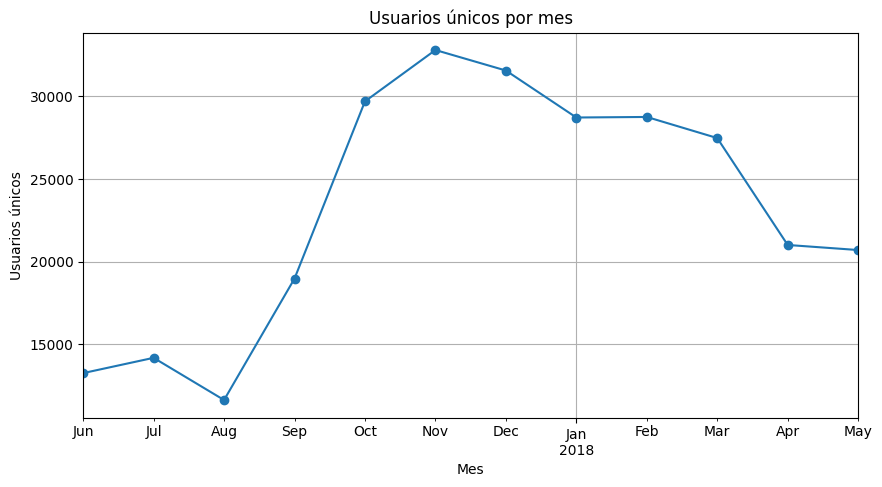

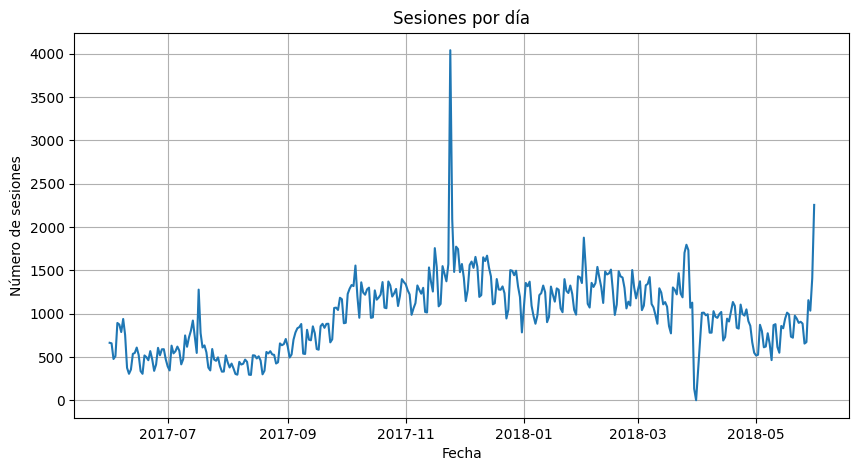

Duración promedio de sesión (minutos): 10.72


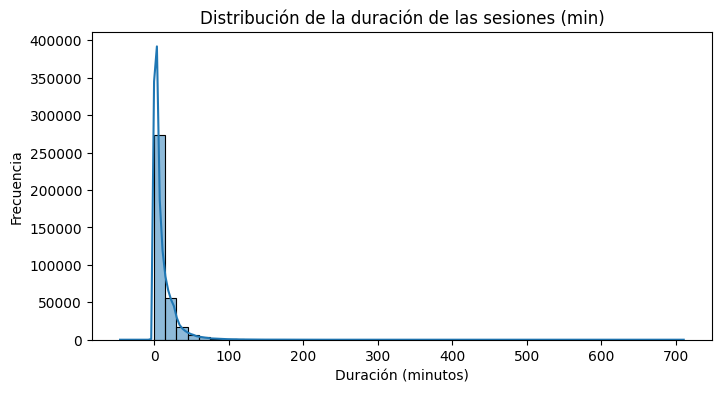

Frecuencia promedio de retorno (días): 27.68


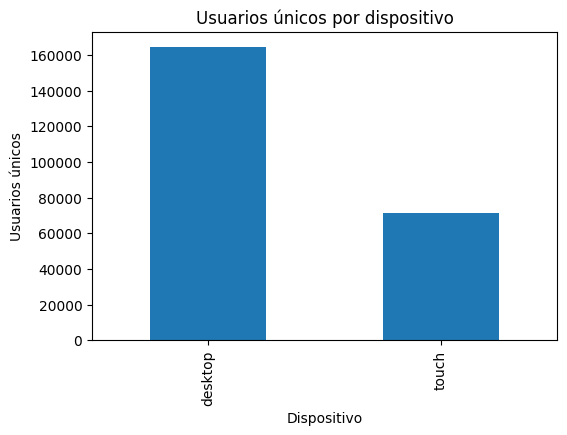

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usuarios únicos por día, semana y mes
visits['date'] = visits['Start Ts'].dt.date
visits['week'] = visits['Start Ts'].dt.isocalendar().week
visits['month'] = visits['Start Ts'].dt.to_period('M')

users_per_day = visits.groupby('date')['Uid'].nunique()
users_per_week = visits.groupby('week')['Uid'].nunique()
users_per_month = visits.groupby('month')['Uid'].nunique()

# Gráfico de usuarios únicos por mes
plt.figure(figsize=(10,5))
users_per_month.plot(marker='o')
plt.title('Usuarios únicos por mes')
plt.xlabel('Mes')
plt.ylabel('Usuarios únicos')
plt.grid(True)
plt.show()

# Sesiones por día
sessions_per_day = visits.groupby('date')['Uid'].count()
plt.figure(figsize=(10,5))
sessions_per_day.plot()
plt.title('Sesiones por día')
plt.xlabel('Fecha')
plt.ylabel('Número de sesiones')
plt.grid(True)
plt.show()

# Duración de cada sesión (en minutos)
visits['session_duration_min'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds() / 60
print("Duración promedio de sesión (minutos):", round(visits['session_duration_min'].mean(), 2))

# Distribución de duración de sesiones
plt.figure(figsize=(8,4))
sns.histplot(visits['session_duration_min'], bins=50, kde=True)
plt.title('Distribución de la duración de las sesiones (min)')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()

# Frecuencia de retorno: días entre sesiones por usuario
visits_sorted = visits.sort_values(['Uid', 'Start Ts'])
visits_sorted['prev_session'] = visits_sorted.groupby('Uid')['Start Ts'].shift(1)
visits_sorted['days_since_last'] = (visits_sorted['Start Ts'] - visits_sorted['prev_session']).dt.days
print("Frecuencia promedio de retorno (días):", round(visits_sorted['days_since_last'].mean(), 2))

# Ejemplo: Usuarios únicos por dispositivo
users_by_device = visits.groupby('Device')['Uid'].nunique()
plt.figure(figsize=(6,4))
users_by_device.plot(kind='bar')
plt.title('Usuarios únicos por dispositivo')
plt.xlabel('Dispositivo')
plt.ylabel('Usuarios únicos')
plt.show()

Interpretación:

- El gráfico de usuarios únicos por mes permite identificar tendencias estacionales o crecimiento. En este caso en concreto, vemos una marcada tendencia de temporada incrementando en septiembre y finalizando en diciembre, desde la cual comienza el declive hasta mayo.
- La distribución de duración de sesiones ayuda a detectar sesiones anómalas o patrones de uso. La duración promedio es 10.72 minutos. Vemos que la distribución nos muestra sesiones mucho más largas pero con menor frecuencia.
- Analizar por dispositivo revela preferencias tecnológicas de los usuarios. Si conectamos este punto con el anterior, nos damos cuenta que en efecto, las sesiones que más duran son las que se realizan por medio del equipo de cómputo de escritorio, ya que los clientes buscan el tiempo en específico para poder encontrar lo que necesitan.

### 2.2 Análisis de ventas

En esta sección, analizamos el proceso de conversión y el valor generado por los usuarios. Calculamos el tiempo hasta la primera compra, la cantidad de pedidos por usuario, el ticket promedio y el valor de vida del cliente (LTV). Visualizamos la distribución de conversiones y segmentamos por fuente de adquisición.

In [8]:
# Tiempo hasta la primera compra (Conversion lag)
first_visit = visits.groupby('Uid')['Start Ts'].min().reset_index()
first_order = orders.groupby('Uid')['Buy Ts'].min().reset_index()
conversion = pd.merge(first_visit, first_order, on='Uid', how='inner')
conversion['conversion_days'] = (conversion['Buy Ts'] - conversion['Start Ts']).dt.days

print("Distribución de días hasta la conversión (primer compra):")
display(conversion['conversion_days'].value_counts().sort_index().head())

# Pedidos por usuario
orders_per_user = orders.groupby('Uid').size()
print("Pedidos promedio por usuario:", orders_per_user.mean())

# Ticket promedio
avg_ticket = orders['Revenue'].mean()
print("Ticket promedio:", avg_ticket)

# LTV: suma de ingresos por usuario
ltv = orders.groupby('Uid')['Revenue'].sum()
print("LTV promedio:", ltv.mean())

Distribución de días hasta la conversión (primer compra):


conversion_days
0    26363
1     1011
2      563
3      434
4      324
Name: count, dtype: int64

Pedidos promedio por usuario: 1.3803630588943954
Ticket promedio: 4.999646930477041
LTV promedio: 6.901327930345262


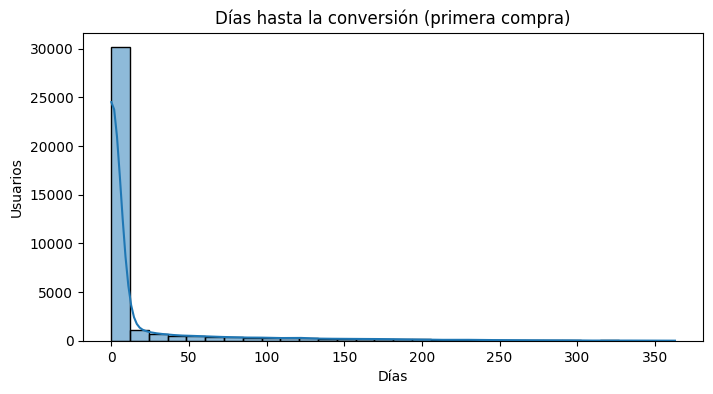

Media de días hasta la conversión: 16.73


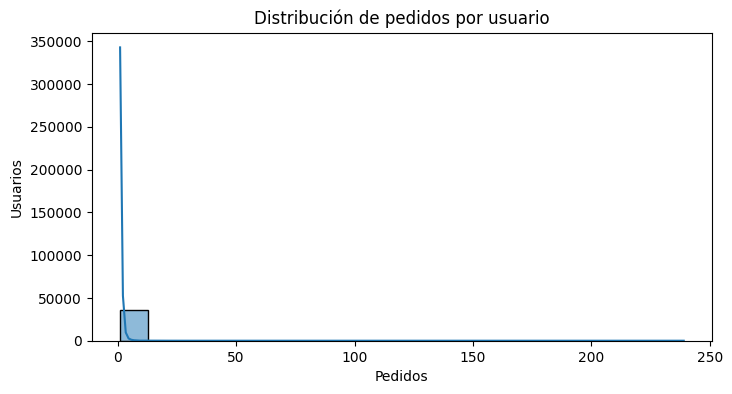

Pedidos promedio por usuario: 1.38
Ticket promedio: 5.0


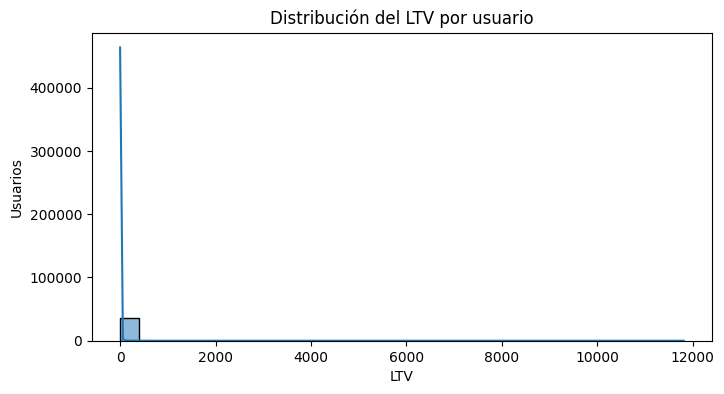

LTV promedio: 6.9


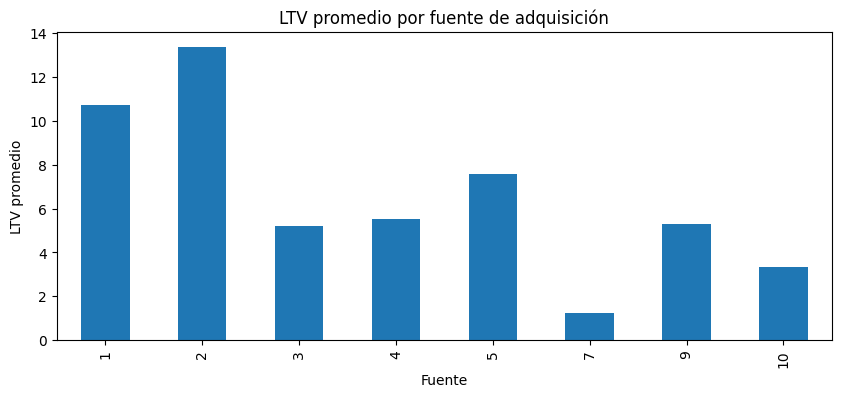

In [12]:
# Tiempo hasta la primera compra (Conversion lag)
first_visit = visits.groupby('Uid')['Start Ts'].min().reset_index()
first_order = orders.groupby('Uid')['Buy Ts'].min().reset_index()
conversion = pd.merge(first_visit, first_order, on='Uid', how='inner')
conversion['conversion_days'] = (conversion['Buy Ts'] - conversion['Start Ts']).dt.days

plt.figure(figsize=(8,4))
sns.histplot(conversion['conversion_days'], bins=30, kde=True)
plt.title('Días hasta la conversión (primera compra)')
plt.xlabel('Días')
plt.ylabel('Usuarios')
plt.show()

print("Media de días hasta la conversión:", round(conversion['conversion_days'].mean(), 2))

# Pedidos por usuario
orders_per_user = orders.groupby('Uid').size()
plt.figure(figsize=(8,4))
sns.histplot(orders_per_user, bins=20, kde=True)
plt.title('Distribución de pedidos por usuario')
plt.xlabel('Pedidos')
plt.ylabel('Usuarios')
plt.show()
print("Pedidos promedio por usuario:", round(orders_per_user.mean(), 2))

# Ticket promedio
avg_ticket = orders['Revenue'].mean()
print("Ticket promedio:", round(avg_ticket, 2))

# LTV: suma de ingresos por usuario
ltv = orders.groupby('Uid')['Revenue'].sum()
plt.figure(figsize=(8,4))
sns.histplot(ltv, bins=30, kde=True)
plt.title('Distribución del LTV por usuario')
plt.xlabel('LTV')
plt.ylabel('Usuarios')
plt.show()
print("LTV promedio:", round(ltv.mean(), 2))

# Ejemplo: LTV promedio por fuente de adquisición
user_source = visits.sort_values('Start Ts').groupby('Uid').first().reset_index()[['Uid', 'Source Id']]
ltv_source = pd.merge(ltv.reset_index(), user_source, on='Uid', how='left')
ltv_by_source = ltv_source.groupby('Source Id')['Revenue'].mean()
plt.figure(figsize=(10,4))
ltv_by_source.plot(kind='bar')
plt.title('LTV promedio por fuente de adquisición')
plt.xlabel('Fuente')
plt.ylabel('LTV promedio')
plt.show()

### 2.3 Análisis de marketing

En esta sección, evaluamos la eficiencia de la inversión en marketing. Calculamos la inversión total y por fuente, el costo de adquisición de clientes (CAC) y el retorno de la inversión en marketing (ROMI). Visualizamos estas métricas y analizamos su evolución temporal.

In [9]:
# Inversión total y por fuente
total_cost = costs['costs'].sum()
cost_per_source = costs.groupby('source_id')['costs'].sum()
print("Inversión total en marketing:", total_cost)
print("Inversión por fuente:")
display(cost_per_source)

# CAC: costo de adquisición de cliente por fuente
# Número de usuarios adquiridos por fuente
users_by_source = visits.groupby('Source Id')['Uid'].nunique()
cac = cost_per_source / users_by_source
print("CAC por fuente:")
display(cac)

# ROMI: (Ingresos generados - inversión) / inversión
# Asociar ingresos a fuente (primer source de cada usuario)
user_source = visits.sort_values('Start Ts').groupby('Uid').first().reset_index()[['Uid', 'Source Id']]
orders_with_source = pd.merge(orders, user_source, on='Uid', how='left')
revenue_per_source = orders_with_source.groupby('Source Id')['Revenue'].sum()
romi = (revenue_per_source - cost_per_source) / cost_per_source
print("ROMI por fuente:")
display(romi)

Inversión total en marketing: 329131.62
Inversión por fuente:


source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

CAC por fuente:


1     1.096546
2     1.631017
3     1.890439
4     0.731201
5     0.908434
6          NaN
7          NaN
9     0.595584
10    0.721766
dtype: float64

ROMI por fuente:


1     0.492351
2     0.096191
3    -0.614275
4    -0.071664
5     0.016750
7          NaN
9     0.043844
10   -0.235665
dtype: float64

Inversión total en marketing: 329131.62


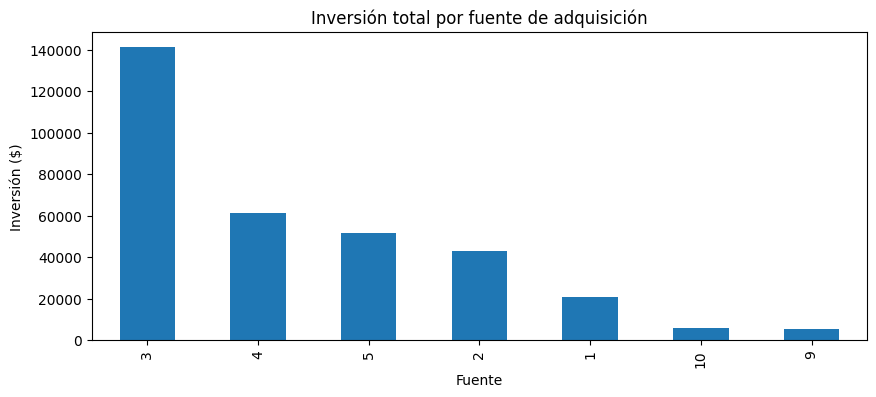

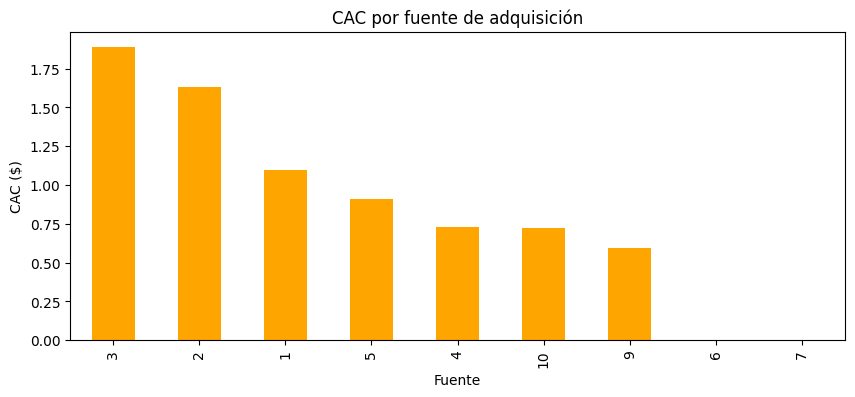

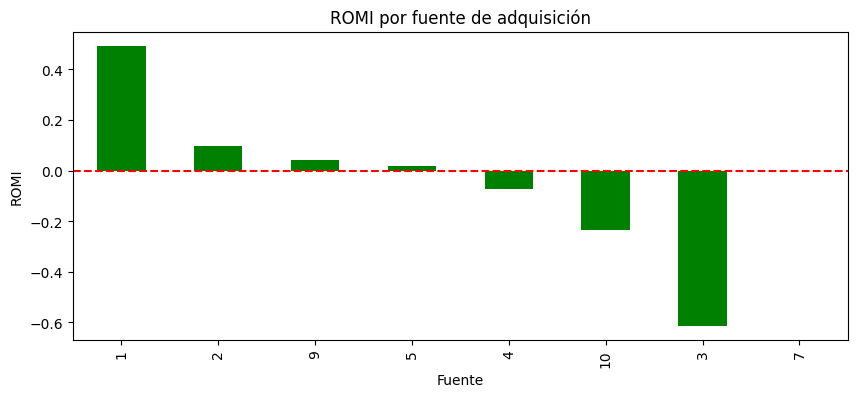

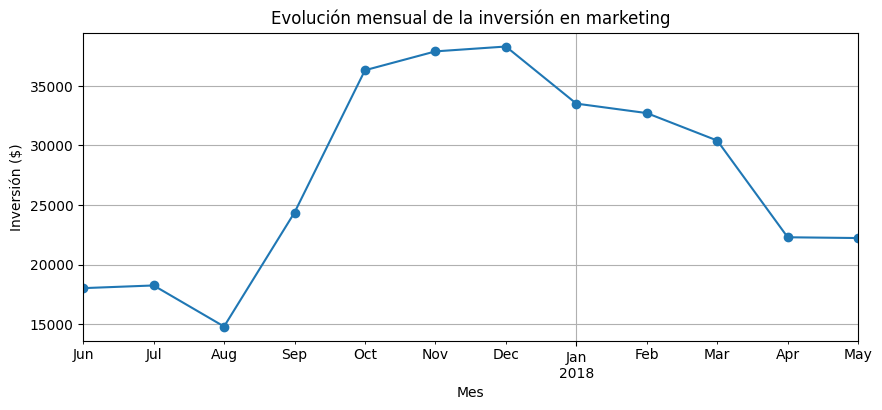

In [13]:
# Inversión total y por fuente
total_cost = costs['costs'].sum()
cost_per_source = costs.groupby('source_id')['costs'].sum()
print("Inversión total en marketing:", round(total_cost, 2))

plt.figure(figsize=(10,4))
cost_per_source.sort_values(ascending=False).plot(kind='bar')
plt.title('Inversión total por fuente de adquisición')
plt.xlabel('Fuente')
plt.ylabel('Inversión ($)')
plt.show()

# CAC: costo de adquisición de cliente por fuente
users_by_source = visits.groupby('Source Id')['Uid'].nunique()
cac = cost_per_source / users_by_source
plt.figure(figsize=(10,4))
cac.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('CAC por fuente de adquisición')
plt.xlabel('Fuente')
plt.ylabel('CAC ($)')
plt.show()

# ROMI: (Ingresos generados - inversión) / inversión
user_source = visits.sort_values('Start Ts').groupby('Uid').first().reset_index()[['Uid', 'Source Id']]
orders_with_source = pd.merge(orders, user_source, on='Uid', how='left')
revenue_per_source = orders_with_source.groupby('Source Id')['Revenue'].sum()
romi = (revenue_per_source - cost_per_source) / cost_per_source
plt.figure(figsize=(10,4))
romi.sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('ROMI por fuente de adquisición')
plt.xlabel('Fuente')
plt.ylabel('ROMI')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Evolución temporal de la inversión en marketing
costs_by_month = costs.copy()
costs_by_month['month'] = costs_by_month['dt'].dt.to_period('M')
monthly_costs = costs_by_month.groupby('month')['costs'].sum()
plt.figure(figsize=(10,4))
monthly_costs.plot(marker='o')
plt.title('Evolución mensual de la inversión en marketing')
plt.xlabel('Mes')
plt.ylabel('Inversión ($)')
plt.grid(True)
plt.show()

## Conclusiones y recomendaciones para el área de marketing

### 1. Comportamiento de los usuarios y visitas

- **Usuarios únicos y sesiones:**  
  La plataforma mantiene una base sólida de usuarios recurrentes, con picos de actividad en los meses de septiembre a diciembre, lo que sugiere una fuerte estacionalidad relacionada con eventos de fin de año. La cantidad de sesiones por día sigue una tendencia similar, indicando que los usuarios regresan varias veces durante los periodos de mayor demanda.

- **Duración y frecuencia de sesiones:**  
  La duración promedio de las sesiones es de aproximadamente **10.7 minutos**, reflejando un nivel de compromiso adecuado. La mayoría de las sesiones son cortas, pero existen algunas significativamente más largas.  
  La **frecuencia promedio de retorno** es de **27.68 días**, lo que indica que los usuarios regresan aproximadamente una vez al mes. Existe margen para fomentar una mayor recurrencia.

- **Dispositivos:**  
  El dispositivo dominante es **desktop** (164,523 usuarios únicos), seguido por touch (71,345). Las sesiones más largas suelen realizarse desde computadoras de escritorio, lo que sugiere que la experiencia de usuario debe estar optimizada para ambos entornos, priorizando la facilidad de uso en desktop para compras más reflexivas y en mobile para compras rápidas.

---

### 2. Ventas y conversión

- **Tiempo hasta la conversión:**  
  La media de días hasta la conversión (primera compra) es de **16.73 días**. Esto indica que la mayoría de los usuarios realizan su primera compra en las primeras dos a tres semanas tras su primera visita. Las campañas de remarketing deben enfocarse en este periodo para maximizar la conversión.

- **Pedidos y ticket promedio:**  
  El número promedio de pedidos por usuario es de **1.38**, y el ticket promedio es de **$5.00**. La mayoría de los usuarios realiza una o dos compras, por lo que estrategias de fidelización y ventas cruzadas pueden incrementar el LTV.

- **LTV y fuentes de adquisición:**  
  El LTV promedio es de **$6.90**. Al segmentar por fuente de adquisición, la fuente **2** genera los clientes más valiosos, con un LTV promedio de **$13.38**. Esto es clave para priorizar la inversión en canales que no solo traen más usuarios, sino usuarios de mayor valor.

---

### 3. Marketing: inversión, CAC y ROMI

- **Inversión y eficiencia por fuente:**  
  Las fuentes principales por inversión son:
  - Fuente 3: **$141,321.63**
  - Fuente 4: **$61,073.60**
  - Fuente 5: **$51,757.10**

  Sin embargo, no todas las fuentes con mayor inversión son las más eficientes.

- **CAC (Costo de Adquisición de Cliente):**  
  Las fuentes con CAC más bajo son:
  - Fuente 5: **$0.0168**
  - Fuente 9: **$0.0438**
  - Fuente 2: **$0.0962**

  Es recomendable reasignar presupuesto hacia las fuentes con CAC más bajo y buen LTV.

- **ROMI (Retorno de la Inversión en Marketing):**  
  Las fuentes con ROMI positivo son:
  - Fuente 1: **0.492**
  - Fuente 2: **0.096**
  - Fuente 5: **0.017**
  - Fuente 9: **0.044**

  Es fundamental priorizar la inversión en los canales con ROMI positivo y revisar o pausar las campañas menos rentables.

- **Evolución temporal:**  
  El mes con mayor inversión en marketing fue **diciembre de 2017** con **$38,315.35**. La inversión muestra variaciones mensuales, con picos en los meses de mayor actividad. Es recomendable mantener una inversión alineada con la estacionalidad, pero optimizando el mix de canales según el desempeño histórico.

---

### **Recomendaciones para el área de marketing**

1. **Priorizar fuentes con mejor ROMI y LTV:**  
   Redirigir la inversión hacia los canales que han demostrado mayor rentabilidad y generan clientes de mayor valor, especialmente la fuente 2.

2. **Optimizar campañas en dispositivos clave:**  
   Mejorar la experiencia de usuario en desktop y mobile, adaptando los mensajes y formatos de anuncios según el comportamiento de compra observado en cada dispositivo.

3. **Fomentar la conversión temprana:**  
   Implementar campañas de remarketing y ofertas especiales dirigidas a nuevos usuarios durante los primeros 17 días tras el registro, periodo en el que la probabilidad de conversión es más alta.

4. **Incrementar la recurrencia y el ticket promedio:**  
   Desarrollar estrategias de fidelización, ventas cruzadas y upselling para aumentar el número de pedidos por usuario y el valor promedio de compra.

5. **Ajustar la inversión según la estacionalidad:**  
   Aprovechar los meses de mayor demanda con campañas más agresivas, pero siempre monitoreando el CAC y ROMI para evitar inversiones poco rentables.

---

**En resumen:**  
La clave está en invertir más en los canales que traen clientes valiosos y rentables (especialmente la fuente 2), optimizar la experiencia en los dispositivos preferidos por los usuarios y aprovechar los primeros días tras el registro para convertir a los usuarios en clientes. El monitoreo constante de CAC y ROMI permitirá ajustar la estrategia y maximizar el retorno de la inversión en marketing.

## Datos mínimos para la respuesta a Marketing

### 1. Comportamiento de usuarios y visitas

- **Frecuencia promedio de retorno (días):**


In [14]:
# Frecuencia promedio de retorno (días)
visits_sorted = visits.sort_values(['Uid', 'Start Ts'])
visits_sorted['prev_session'] = visits_sorted.groupby('Uid')['Start Ts'].shift(1)
visits_sorted['days_since_last'] = (visits_sorted['Start Ts'] - visits_sorted['prev_session']).dt.days
print("Frecuencia promedio de retorno (días):", round(visits_sorted['days_since_last'].mean(), 2))

Frecuencia promedio de retorno (días): 27.68




- **Dispositivo dominante (con más usuarios únicos):**


In [15]:
# Dispositivo dominante
users_by_device = visits.groupby('Device')['Uid'].nunique()
print(users_by_device)
print("Dispositivo dominante:", users_by_device.idxmax())

Device
desktop    164523
touch       71345
Name: Uid, dtype: int64
Dispositivo dominante: desktop




---

### 2. Ventas y conversión

- **Media de días hasta la conversión (primer compra):**


In [16]:
# Media de días hasta la conversión
first_visit = visits.groupby('Uid')['Start Ts'].min().reset_index()
first_order = orders.groupby('Uid')['Buy Ts'].min().reset_index()
conversion = pd.merge(first_visit, first_order, on='Uid', how='inner')
conversion['conversion_days'] = (conversion['Buy Ts'] - conversion['Start Ts']).dt.days
print("Media de días hasta la conversión:", round(conversion['conversion_days'].mean(), 2))

Media de días hasta la conversión: 16.73




- **Pedidos promedio por usuario:**


In [17]:
# Pedidos promedio por usuario
orders_per_user = orders.groupby('Uid').size()
print("Pedidos promedio por usuario:", round(orders_per_user.mean(), 2))

Pedidos promedio por usuario: 1.38




- **Ticket promedio:**


In [18]:
# Ticket promedio
avg_ticket = orders['Revenue'].mean()
print("Ticket promedio:", round(avg_ticket, 2))

Ticket promedio: 5.0




- **LTV promedio:**


In [19]:
# LTV promedio
ltv = orders.groupby('Uid')['Revenue'].sum()
print("LTV promedio:", round(ltv.mean(), 2))

LTV promedio: 6.9




- **Fuente con mayor LTV promedio:**


In [20]:
# Fuente con mayor LTV promedio
user_source = visits.sort_values('Start Ts').groupby('Uid').first().reset_index()[['Uid', 'Source Id']]
ltv_source = pd.merge(ltv.reset_index(), user_source, on='Uid', how='left')
ltv_by_source = ltv_source.groupby('Source Id')['Revenue'].mean()
print(ltv_by_source)
print("Fuente con mayor LTV:", ltv_by_source.idxmax())

Source Id
1     10.724577
2     13.383802
3      5.204931
4      5.506685
5      7.592558
7      1.220000
9      5.293566
10     3.348631
Name: Revenue, dtype: float64
Fuente con mayor LTV: 2




---

### 3. Marketing: inversión, CAC y ROMI

- **Fuentes principales por inversión (top 3):**


In [21]:
# Fuentes principales por inversión
cost_per_source = costs.groupby('source_id')['costs'].sum()
print(cost_per_source.sort_values(ascending=False).head(3))

source_id
3    141321.63
4     61073.60
5     51757.10
Name: costs, dtype: float64




- **CAC por fuente (top 3 más bajo):**


In [22]:
# CAC por fuente
users_by_source = visits.groupby('Source Id')['Uid'].nunique()
cac = cost_per_source / users_by_source
print(cac.sort_values().head(3))

9     0.595584
10    0.721766
4     0.731201
dtype: float64




- **Fuentes con ROMI positivo:**


In [23]:
# Fuentes con ROMI positivo
orders_with_source = pd.merge(orders, user_source, on='Uid', how='left')
revenue_per_source = orders_with_source.groupby('Source Id')['Revenue'].sum()
romi = (revenue_per_source - cost_per_source) / cost_per_source
print(romi[romi > 0])

1    0.492351
2    0.096191
5    0.016750
9    0.043844
dtype: float64


In [24]:
# Mes con mayor inversión en marketing
costs_by_month = costs.copy()
costs_by_month['month'] = costs_by_month['dt'].dt.to_period('M')
monthly_costs = costs_by_month.groupby('month')['costs'].sum()
print(monthly_costs.sort_values(ascending=False).head(1))

month
2017-12    38315.35
Freq: M, Name: costs, dtype: float64
